In [46]:
%matplotlib notebook
from matplotlib import pyplot as plt,style
import pandas as pd
import numpy as np
from sklearn import linear_model

style.use("ggplot")

In [47]:
df = pd.read_csv(r"D:\data_for_analysis\Student_Performance\sp.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [48]:
df.shape

(1000, 8)

In [49]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [50]:
df.columns = [i.capitalize() for i in df.columns]

In [51]:
df.columns

Index(['Gender', 'Race/ethnicity', 'Parental level of education', 'Lunch',
       'Test preparation course', 'Math score', 'Reading score',
       'Writing score'],
      dtype='object')

In [52]:
df.head()

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [53]:
df["Total"] = df["Math score"] + df["Reading score"] + df["Writing score"] 

In [54]:
df.head()

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [68]:
df[df["Total"]==df["Total"].max()]

,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Total
458,female,group E,bachelor's degree,standard,none,100,100,100,300
916,male,group E,bachelor's degree,standard,completed,100,100,100,300
962,female,group E,associate's degree,standard,none,100,100,100,300


In [55]:
df.isna().sum()

Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
Total                          0
dtype: int64

In [56]:
df["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [57]:
df.groupby(["Gender"])["Total"].median()

Gender
female    211
male      199
Name: Total, dtype: int64

In [58]:
df_total = df.groupby(["Gender"])["Total"].median().rename_axis("Gender").reset_index(name="Median")
df_total

,Gender,Median
0,female,211
1,male,199


In [59]:
df_total.loc[(df_total.Gender== 'female'),'Gender']='Female'
df_total.loc[(df_total.Gender== 'male'),'Gender']='Male'
df_total

,Gender,Median
0,Female,211
1,Male,199


<IPython.core.display.Javascript object>


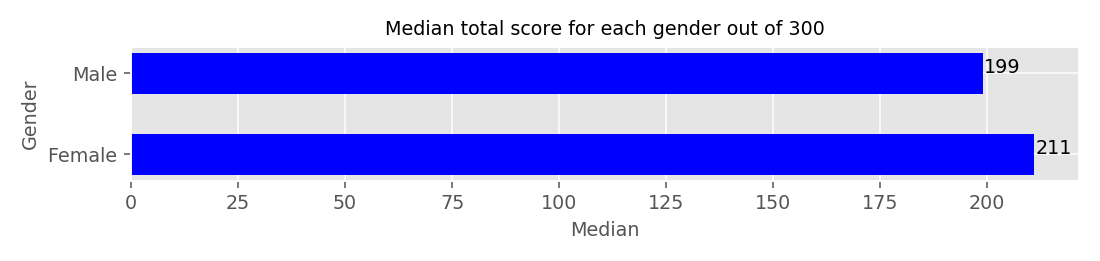

In [60]:
fig, ax = plt.subplots(figsize = (8, 1.9))
width = 0.5
ax.barh(df_total["Gender"], df_total["Median"], width, color="blue")
for i, v in enumerate(df_total["Median"]):
    ax.text(v + 0.3, i, str(v), color='black', fontsize = 10)
plt.xlabel("Median", fontsize = 10)
plt.ylabel("Gender", fontsize = 10)
plt.title("Median total score for each gender out of 300",fontsize = 10)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.tight_layout()
plt.show()

In [61]:
#df.groupby(["Gender"])["Math score"].median()
df_totalm = df.groupby(["Gender"])["Math score"].median().rename_axis("Gender").reset_index(name="Median")
df_totalm.loc[(df_totalm.Gender== 'female'),'Gender']='Female'
df_totalm.loc[(df_totalm.Gender== 'male'),'Gender']='Male'

df_totalm

,Gender,Median
0,Female,65
1,Male,69


<IPython.core.display.Javascript object>


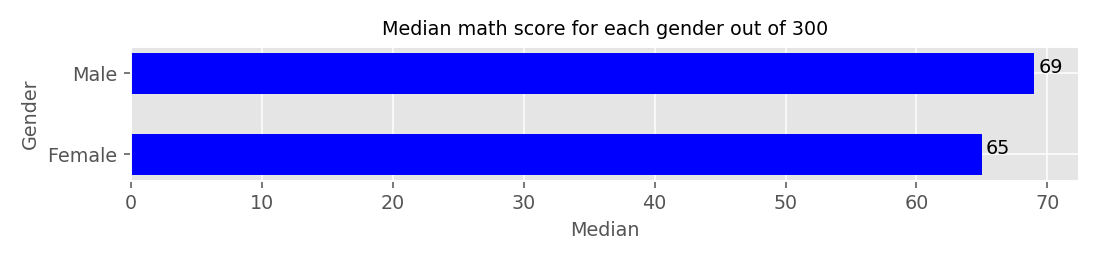

In [62]:
fig, ax = plt.subplots(figsize = (8, 1.9))
width = 0.5
ax.barh(df_totalm["Gender"], df_totalm["Median"], width, color="blue")
for i, v in enumerate(df_totalm["Median"]):
    ax.text(v + 0.3, i, str(v), color='black', fontsize = 10)
plt.xlabel("Median", fontsize = 10)
plt.ylabel("Gender", fontsize = 10)
plt.title("Median math score for each gender out of 300",fontsize = 10)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.tight_layout()
plt.show()

In [63]:
#df.groupby(["Gender"])["Reading score"].median()
df_totalr = df.groupby(["Gender"])["Reading score"].median().rename_axis("Gender").reset_index(name="Median")
df_totalr.loc[(df_totalr.Gender== 'female'),'Gender']='Female'
df_totalr.loc[(df_totalr.Gender== 'male'),'Gender']='Male'

df_totalr

,Gender,Median
0,Female,73
1,Male,66


<IPython.core.display.Javascript object>


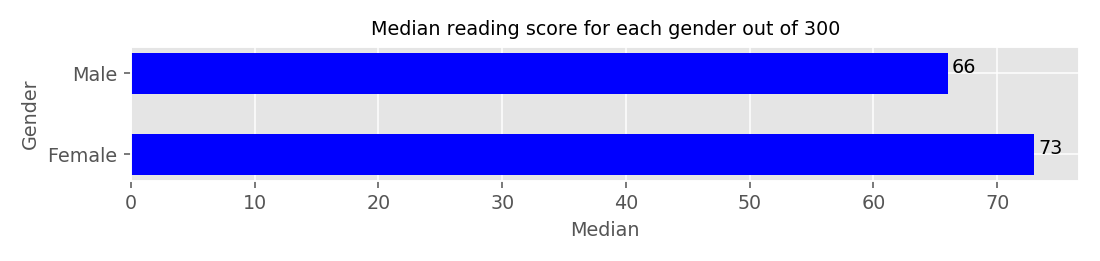

In [64]:
fig, ax = plt.subplots(figsize = (8, 1.9))
width = 0.5
ax.barh(df_totalr["Gender"], df_totalr["Median"], width, color="blue")
for i, v in enumerate(df_totalr["Median"]):
    ax.text(v + 0.3, i, str(v), color='black', fontsize = 10)
plt.xlabel("Median", fontsize = 10)
plt.ylabel("Gender", fontsize = 10)
plt.title("Median reading score for each gender out of 300",fontsize = 10)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.tight_layout()
plt.show()

In [66]:
#df.groupby(["Gender"])["Writing score"].median()
df_totalw = df.groupby(["Gender"])["Writing score"].median().rename_axis("Gender").reset_index(name="Median")
df_totalw.loc[(df_totalw.Gender== 'female'),'Gender']='Female'
df_totalw.loc[(df_totalw.Gender== 'male'),'Gender']='Male'

df_totalw

,Gender,Median
0,Female,74
1,Male,64


<IPython.core.display.Javascript object>


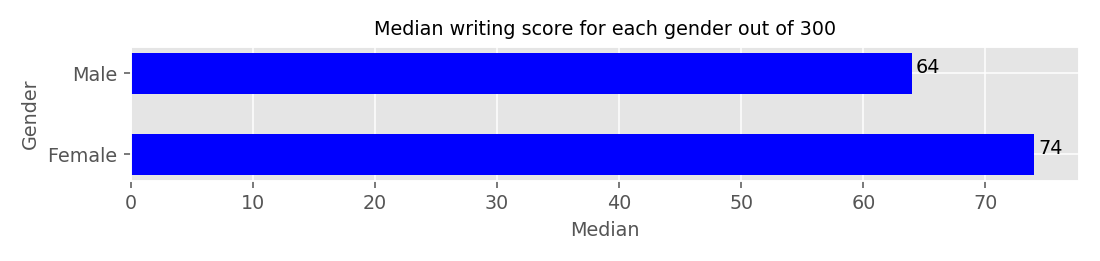

In [67]:
fig, ax = plt.subplots(figsize = (8, 1.9))
width = 0.5
ax.barh(df_totalw["Gender"], df_totalw["Median"], width, color="blue")
for i, v in enumerate(df_totalw["Median"]):
    ax.text(v + 0.3, i, str(v), color='black', fontsize = 10)
plt.xlabel("Median", fontsize = 10)
plt.ylabel("Gender", fontsize = 10)
plt.title("Median writing score for each gender out of 300",fontsize = 10)
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)
plt.tight_layout()
plt.show()

In [22]:
df_totalm.set_index('Gender',inplace=True)
df_totalr.set_index('Gender',inplace=True)
df_totalw.set_index('Gender',inplace=True)
df_scores = pd.concat([df_totalm,df_totalr,df_totalw],axis=1,sort=False).reset_index()
df_scores.columns = ["Gender","Median math scores","Median reading scores","Median writing scores"]

In [23]:
df_scores.reset_index(inplace=True)
df_scores

,index,Gender,Median math scores,Median reading scores,Median writing scores
0,0,Female,65,73,74
1,1,Male,69,66,64


<IPython.core.display.Javascript object>


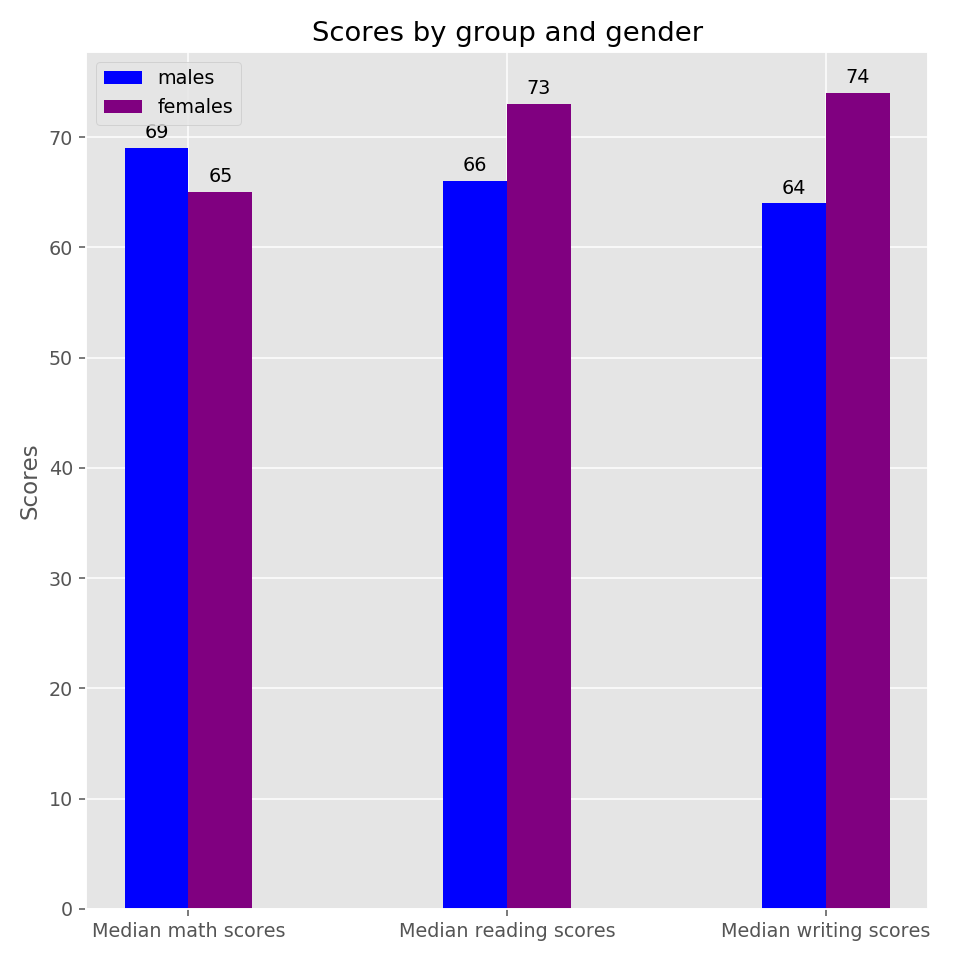

In [24]:
labels = ["Median math scores","Median reading scores","Median writing scores"]
male_medians=list(df_scores.loc[df_scores["Gender"] == "Male", "Median math scores"].values) + list(df_scores.loc[df_scores["Gender"] == "Male", "Median reading scores"].values)+ list(df_scores.loc[df_scores["Gender"] == "Male", "Median writing scores"].values)


labels = ["Median math scores","Median reading scores","Median writing scores"]
female_medians=list(df_scores.loc[df_scores["Gender"] == "Female", "Median math scores"].values) + list(df_scores.loc[df_scores["Gender"] == "Female", "Median reading scores"].values)+ list(df_scores.loc[df_scores["Gender"] == "Female", "Median writing scores"].values)



x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, male_medians, width, label='males', color="blue")
rects2 = ax.bar(x + width/2, female_medians, width, label='females',color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [113]:
df_eth_totals = df[["Race/ethnicity","Gender","Total"]]

In [114]:
df_eth_totals.head(20)

,Race/ethnicity,Gender,Total
0,group B,female,218
1,group C,female,247
2,group B,female,278
3,group A,male,148
4,group C,male,229
5,group B,female,232
6,group B,female,275
7,group B,male,122
8,group D,male,195
9,group B,female,148


In [115]:
df_eth_tot = df_eth_totals.groupby(["Race/ethnicity","Gender"])

In [121]:
df_eth_tot

In [126]:
##df_eth_tot.get_group(("group A","female"))["Total"].max()
##df_eth_tot.get_group(("group A","male"))["Total"].max()


labels1 = ["group A","group B","group C", "group D", "group E"]
for i in labels1:
    print("Male highest score in",i,": ",df_eth_tot.get_group((i,"male"))["Total"].max())
    print("Female highest score in",i,": ",df_eth_tot.get_group((i,"female"))["Total"].max())
    print()

Male highest score in group A :  282
Feale highest score in group A :  289

Male highest score in group B :  278
Feale highest score in group B :  290

Male highest score in group C :  282
Feale highest score in group C :  296

Male highest score in group D :  296
Feale highest score in group D :  297

Male highest score in group E :  300
Feale highest score in group E :  300



In [127]:
labels1 = ["group A","group B","group C", "group D", "group E"]
for i in labels1:
    print("Male lowest score in",i,": ",df_eth_tot.get_group((i,"male"))["Total"].min())
    print("Female lowest score in",i,": ",df_eth_tot.get_group((i,"female"))["Total"].min())
    print()

Male lowest score in group A :  70
Female lowest score in group A :  123

Male lowest score in group B :  69
Female lowest score in group B :  55

Male lowest score in group C :  90
Female lowest score in group C :  27

Male lowest score in group D :  115
Female lowest score in group D :  93

Male lowest score in group E :  78
Female lowest score in group E :  104



In [111]:
df_eth_totals.loc[df_eth_totals["Total"] == 290]

,Race/ethnicity,Gender,Total
855,group B,female,290


In [25]:
df_eth = df.groupby(["Race/ethnicity"])["Total"].median().rename_axis("Ethnicity").reset_index(name="Median")
df_eth.head()

,Ethnicity,Median
0,group A,184.0
1,group B,195.0
2,group C,205.0
3,group D,210.0
4,group E,220.5


<IPython.core.display.Javascript object>


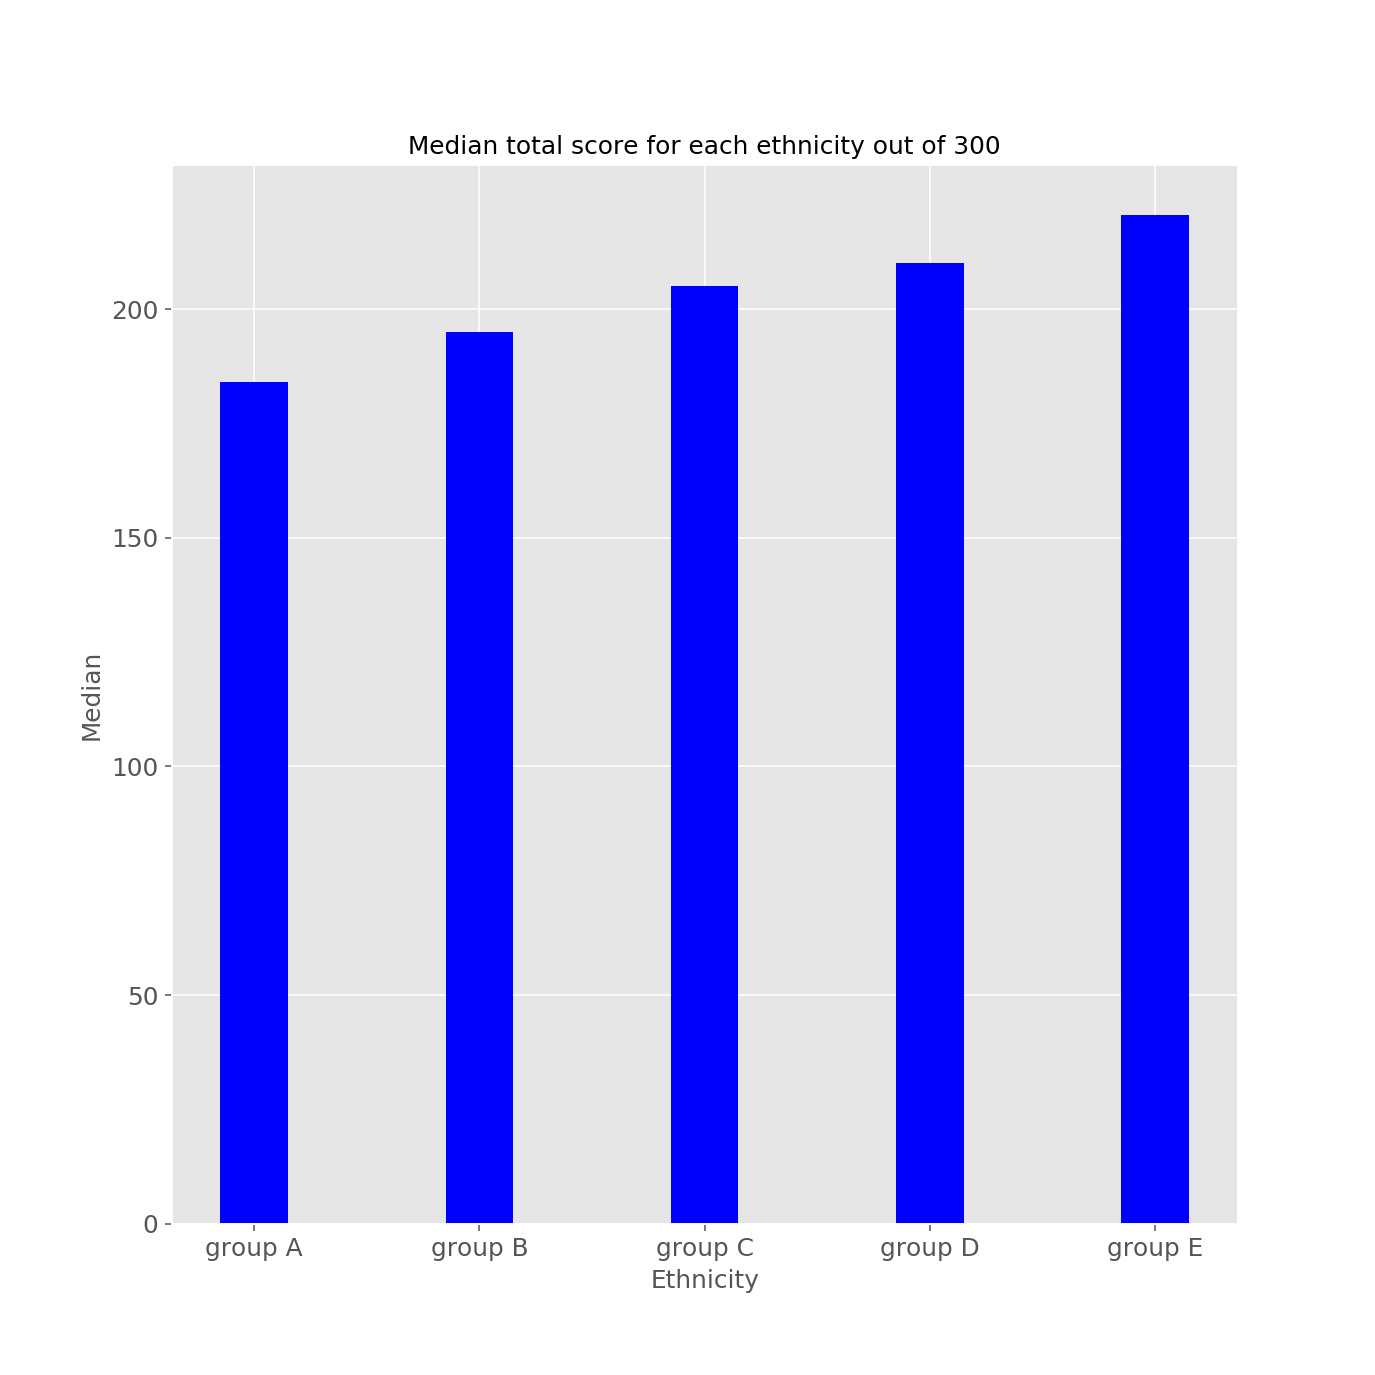

In [26]:
fig, ax = plt.subplots(figsize = (10, 10))
width = 0.3
ax.bar(df_eth["Ethnicity"], df_eth["Median"], width, color="blue")
df_eth = df_eth.astype({"Median": int})
for i, v in enumerate(df_eth["Median"]):
    ax.text(v + 0.3, i, str(v), color='black', fontsize = 13)
    #plt.text(v, i, " "+str(v), color='blue', va='center', fontweight='bold')
plt.ylabel("Median", fontsize = 13)
plt.xlabel("Ethnicity", fontsize = 13)
plt.title("Median total score for each ethnicity out of 300",fontsize = 13)
ax.tick_params(axis="x", labelsize=13)
ax.tick_params(axis="y", labelsize=13)
#plt.tight_layout()
plt.show()

In [27]:
df_ethgen = df.groupby(["Race/ethnicity","Gender"])["Total"].median().rename_axis(["Ethnicity","Gender"]).reset_index(name="Total")
df_ethgen.head()

,Ethnicity,Gender,Total
0,group A,female,191.0
1,group A,male,183.0
2,group B,female,203.0
3,group B,male,188.5
4,group C,female,210.0


<IPython.core.display.Javascript object>


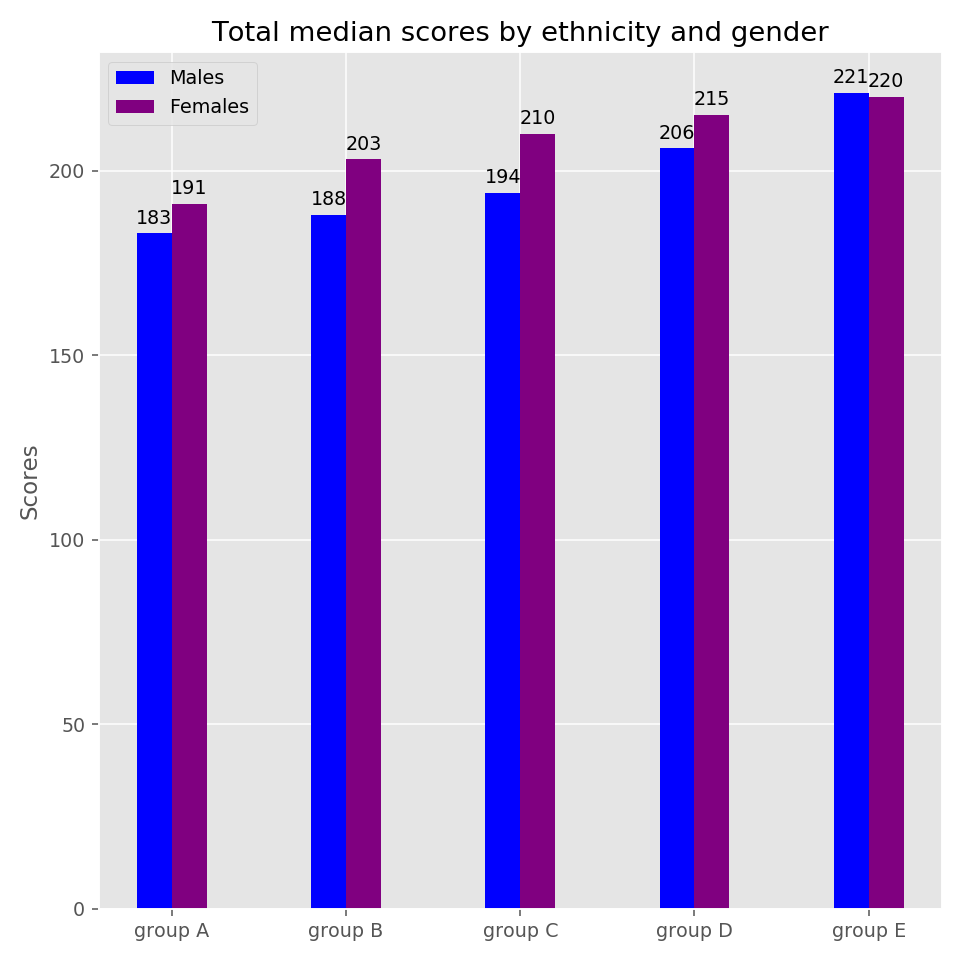

In [28]:
labels = ["group A", "group B","group C","group D","group E"]
male_medians=list(df_ethgen.loc[df_ethgen["Gender"] == "male", "Total"].values)
female_medians=list(df_ethgen.loc[df_ethgen["Gender"] == "female", "Total"].values)#+ list(df_scores.loc[df_scores["Gender"] == "Male", "Median reading scores"].values)+ list(df_scores.loc[df_scores["Gender"] == "Male", "Median writing scores"].values)

male_medians = [int(i) for i in male_medians]
female_medians = [int(i) for i in female_medians]

x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, male_medians, width, label='Males', color="blue")
rects2 = ax.bar(x + width/2, female_medians, width, label='Females',color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Total median scores by ethnicity and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [29]:
df["Test preparation course"].value_counts()

none         642
completed    358
Name: Test preparation course, dtype: int64

In [30]:
df_test_prep = df.groupby(["Gender","Test preparation course"])["Total"].median().rename_axis(["Gender","Test_prep"]).reset_index(name="Median")

In [31]:
df_test_prep.head()

,Gender,Test_prep,Median
0,female,completed,224.0
1,female,none,202.5
2,male,completed,213.0
3,male,none,189.0


<IPython.core.display.Javascript object>


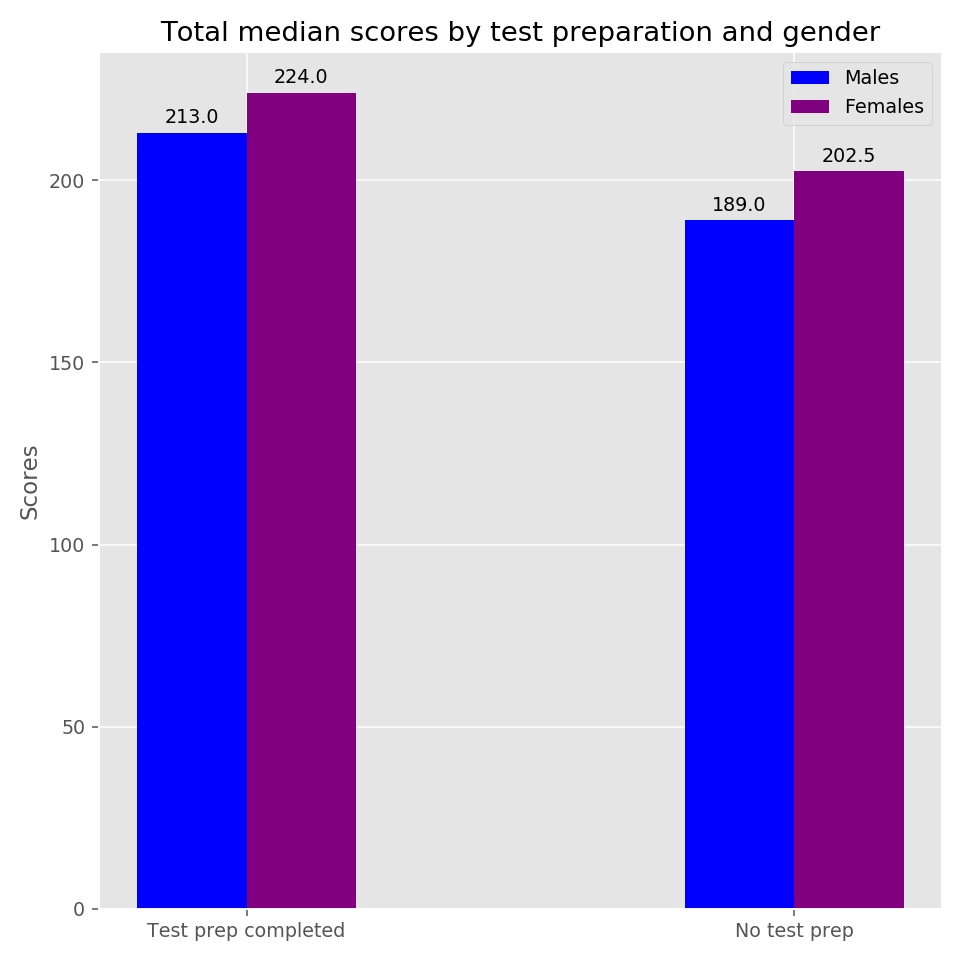

In [32]:
labels = ["Test prep completed", "No test prep"]
male_medians=list(df_test_prep.loc[df_test_prep["Gender"] == "male", "Median"].values)
female_medians=list(df_test_prep.loc[df_test_prep["Gender"] == "female", "Median"].values)

#male_medians = [int(i) for i in male_medians]
#female_medians = [int(i) for i in female_medians]

x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, male_medians, width, label='Males', color="blue")
rects2 = ax.bar(x + width/2, female_medians, width, label='Females',color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Total median scores by test preparation and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [33]:
df_etest_prep = df.groupby(["Race/ethnicity","Test preparation course"])["Total"].median().rename_axis(["Ethnicity","Test_prep"]).reset_index(name="Median")
df_etest_prep

,Ethnicity,Test_prep,Median
0,group A,completed,219.0
1,group A,none,178.0
2,group B,completed,212.0
3,group B,none,188.5
4,group C,completed,218.0
5,group C,none,197.0
6,group D,completed,223.0
7,group D,none,206.0
8,group E,completed,230.5
9,group E,none,212.0


In [34]:
df["Lunch"].value_counts()

standard        645
free/reduced    355
Name: Lunch, dtype: int64

In [37]:
df_lunch  = df[["Gender","Lunch","Total"]]

In [38]:
df_lunch.head()

,Gender,Lunch,Total
0,female,standard,218
1,female,standard,247
2,female,standard,278
3,male,free/reduced,148
4,male,standard,229


In [40]:
df_l = df.groupby(["Gender","Lunch"])["Total"].median().rename_axis(["Gender","Lunch"]).reset_index(name="Median")

In [41]:
df_l.head()

,Gender,Lunch,Median
0,female,free/reduced,193
1,female,standard,219
2,male,free/reduced,182
3,male,standard,206


<IPython.core.display.Javascript object>


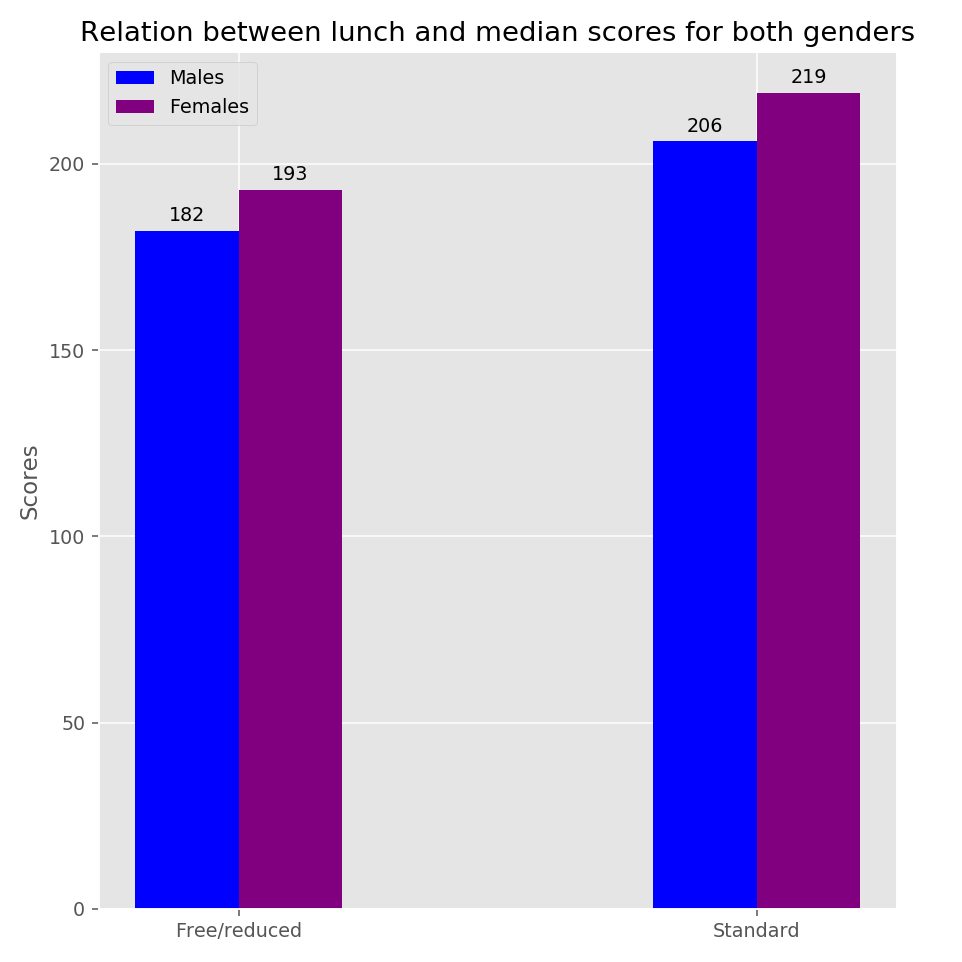

In [42]:
labels = ["Free/reduced", "Standard"]
male_medians=list(df_l.loc[df_l["Gender"] == "male", "Median"].values)
female_medians=list(df_l.loc[df_l["Gender"] == "female", "Median"].values)

#male_medians = [int(i) for i in male_medians]
#female_medians = [int(i) for i in female_medians]

x = np.arange(len(labels))  # the label locations
width = 0.2
fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, male_medians, width, label='Males', color="blue")
rects2 = ax.bar(x + width/2, female_medians, width, label='Females',color="purple")

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Relation between lunch and median scores for both genders')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()